In [1]:
import pandas as pd
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
from matplotlib import pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
import requests 
from bs4 import BeautifulSoup
from html.parser import HTMLParser
from fbprophet import Prophet
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

## Climate and Suicide 

In [59]:
c_df = pd.read_csv('india_climate.csv')

In [210]:
c_df.head()

YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT  \
0  1901  13.58  14.72  17.91  20.93  23.18  24.05  23.82  23.58  22.09  20.20   
1  1902  13.08  14.20  18.44  21.30  23.63  23.97  23.68  23.34  22.11  19.63   
2  1903  13.20  14.55  17.12  20.67  22.95  23.85  23.53  23.29  22.84  20.12   
3  1904  13.04  14.07  17.70  21.42  23.02  23.64  23.35  23.03  21.65  19.50   
4  1905  12.83  12.74  16.88  19.62  23.32  24.13  23.93  24.31  22.47  21.65   

     NOV    DEC  ANNUAL  JAN-FEB  MAR-MAY  JUN-SEP  OCT-DEC  
0  16.16  13.41   19.51    14.16    20.67    23.38    16.59  
1  16.35  13.53   19.44    13.64    21.12    23.28    16.50  
2  15.84  12.93   19.25    13.87    20.25    23.40    16.29  
3  15.77  14.06   19.22    13.72    20.72    22.96    16.44  
4  16.63  13.59   19.03    12.81    19.97    23.43    16.39

In [60]:
climate_years = list(c_df['YEAR'])
climate_vals = list(c_df['ANNUAL'])

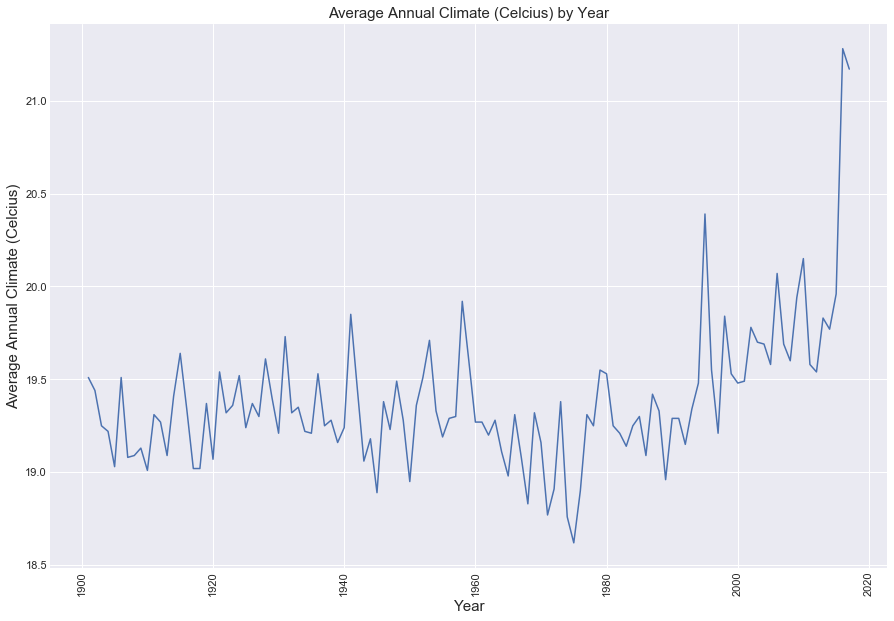

In [209]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,10))
plt.plot(climate_years, climate_vals)
plt.title('Average Annual Climate (Celcius) by Year', fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Average Annual Climate (Celcius)', fontsize = 15)
plt.show()

In [62]:
n_climate_years = climate_years[94:112]
n_climate_vals = climate_vals[94:112]

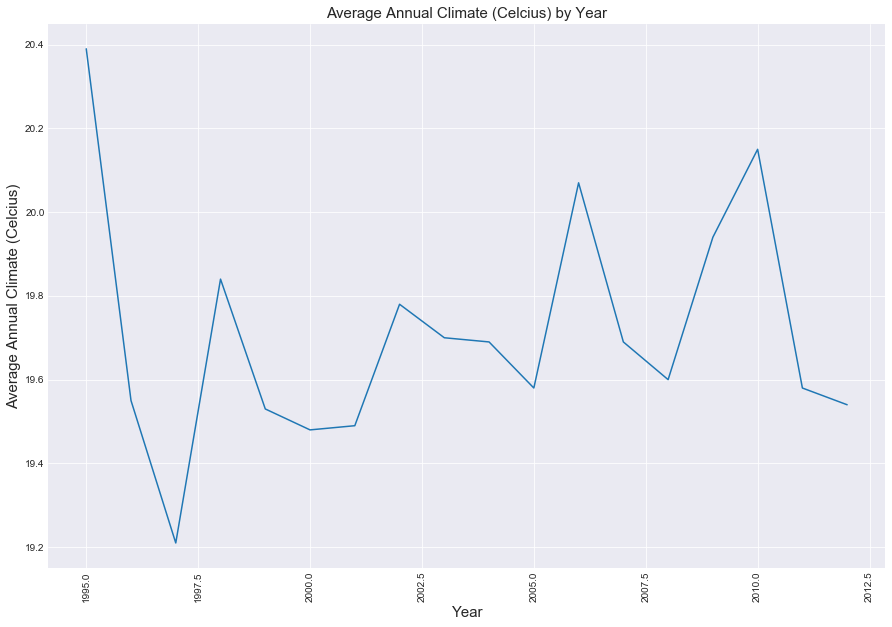

In [63]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,10))
plt.plot(n_climate_years, n_climate_vals)
plt.title('Average Annual Climate (Celcius) by Year', fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Average Annual Climate (Celcius)', fontsize = 15)
plt.show()

In [64]:
s_df = pd.read_csv('Suicides_in_India.csv')
s_df.head()

State  Year Type_code                                 Type  Gender  \
0  A & N ISLANDS  2001    Causes                               Cancer    Male   
1  A & N ISLANDS  2001    Causes                              Divorce    Male   
2  A & N ISLANDS  2001    Causes                        Dowry Dispute  Female   
3  A & N ISLANDS  2001    Causes  Ideological Causes/Hero Worshipping  Female   
4  A & N ISLANDS  2001    Causes                   Illness (Aids/STD)  Female   

  Age_group  Total  
0     15-29      0  
1       60+      0  
2       60+      0  
3       60+      0  
4      0-14      0

In [65]:
totals = []
for i in range(12):
    temp_df = s_df.loc[s_df['Year'] == 2001 + i]
    total = temp_df['Total'].sum()
    totals.append(total)

In [66]:
c_df = pd.read_csv('india_climate.csv')
climate_years = list(c_df['YEAR'])
climate_vals = list(c_df['ANNUAL'])

In [67]:
n_climate_years = climate_years[100:112]
n_climate_vals = climate_vals[100:112]

In [68]:
new_values_climate = []
for i in range(len(n_climate_vals)):
    max1 = max(n_climate_vals)
    min1 = min(n_climate_vals)
    new_values_climate.append((n_climate_vals[i] - min1) / (max1 - min1))

In [69]:
new_values_total = []
for i in range(len(totals)):
    max1 = max(totals)
    min1 = min(totals)
    new_values_total.append((totals[i] - min1) / (max1 - min1))

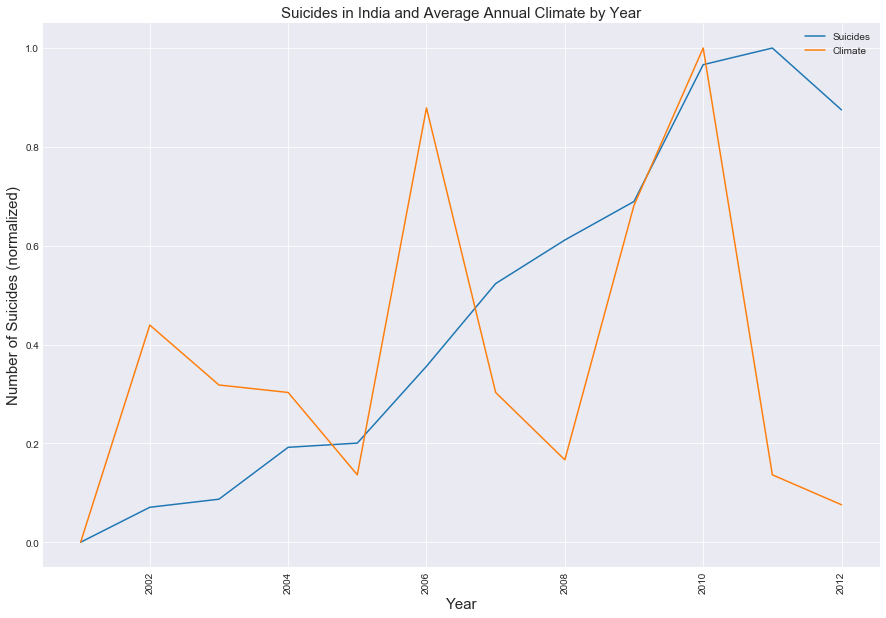

In [70]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,10))
plt.plot(n_climate_years, new_values_total, label='Suicides')
plt.plot(n_climate_years, new_values_climate, label='Climate')
plt.title('Suicides in India and Average Annual Climate by Year', fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Number of Suicides (normalized)', fontsize = 15)
plt.legend()

## Employment and Cereal Yield

In [2]:
yield_df = pd.read_csv('yield.csv')

In [8]:
yield_df.head()

Unnamed: 0   1961   1962   1963   1964   1965   1966   1967    1968  \
0    217619.0  947.3  929.7  965.8  993.6  854.4  864.2  993.7  1036.6   

     1969    1970    1971    1972    1973    1974    1975    1976    1977  \
0  1053.7  1134.8  1136.1  1107.8  1152.8  1074.5  1260.8  1198.7  1331.1   

     1978    1979    1980    1981    1982    1983    1984    1985    1986  \
0  1370.2  1222.3  1350.0  1398.8  1346.4  1564.4  1563.8  1592.2  1585.4   

     1987    1988    1989    1990    1991    1992    1993    1994    1995  \
0  1583.7  1775.8  1916.4  1891.2  1926.3  2024.8  2084.9  2115.5  2111.7   

     1996    1997    1998    1999    2000    2001    2002    2003    2004  \
0  2181.0  2228.6  2248.4  2313.7  2294.2  2423.1  2187.3  2399.4  2350.0   

     2005    2006    2007    2008    2009    2010    2011    2012    2013  \
0  2411.6  2446.5  2583.3  2637.9  2580.8  2676.4  2860.7  2963.5  2969.9   

     2014    2015    2016    2017  
0  2960.4  2856.7  3021.1  3160.8

In [3]:
yield_df = yield_df.set_index('Unnamed: 0')

In [4]:
yield_df = yield_df.T
yield_df = yield_df.dropna()
yields = list(yield_df[217619])
years = yield_df.index.tolist()

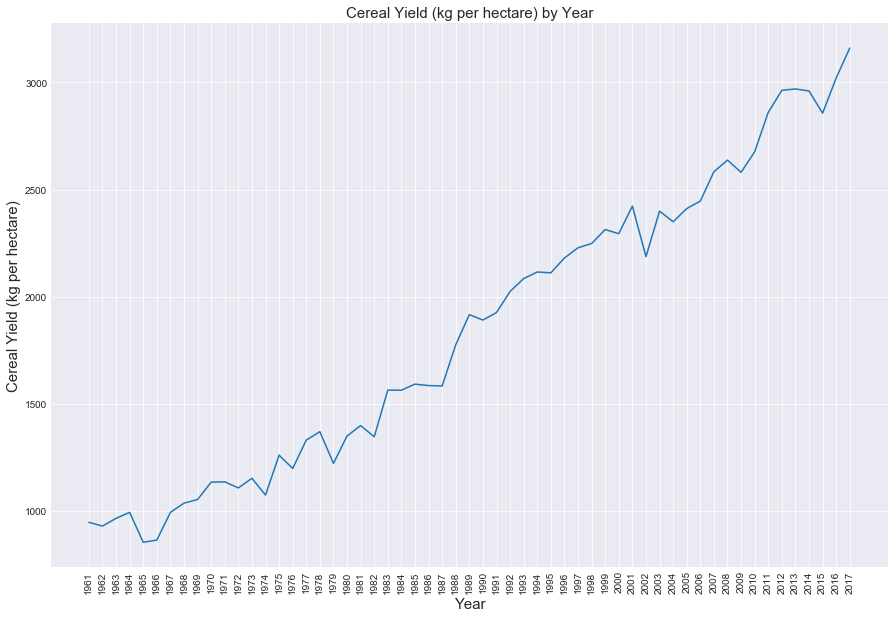

In [5]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,10))
plt.plot(years, yields)
plt.title('Cereal Yield (kg per hectare) by Year', fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Cereal Yield (kg per hectare)', fontsize = 15)
plt.show()

In [6]:
employment1 = pd.read_csv('employment2.csv')
employment1.head()

Unnamed: 0     217868
0        1991  63.048000
1        1992  62.771000
2        1993  62.486000
3        1994  62.178001
4        1995  61.757000

In [7]:
years_em = list(employment1['Unnamed: 0'])
rates = list(employment1['217868'])

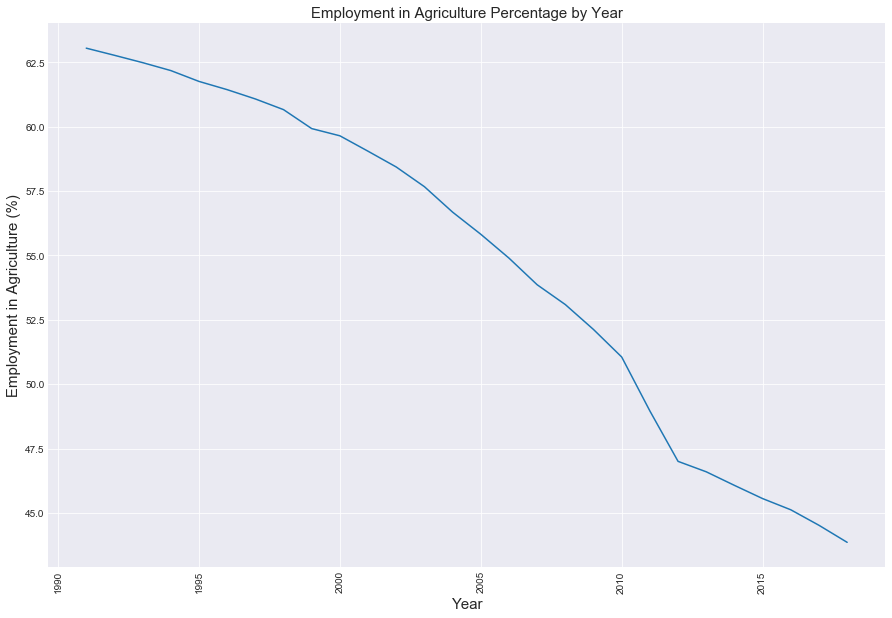

In [8]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,10))
plt.plot(years_em, rates)
plt.title('Employment in Agriculture Percentage by Year', fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Employment in Agriculture (%)', fontsize = 15)
plt.show()

In [42]:
em_normalized = []
for i in range(len(rates)-1):
    max1 = max(rates)
    min1 = min(rates)
    em_normalized.append((rates[i] - min1) / (max1 - min1))

In [43]:
norm_years = years[30:]
norm_yields = yields[30:]

In [44]:
yield_normalized = []
for i in range(len(norm_yields)):
    max1 = max(norm_yields)
    min1 = min(norm_yields)
    yield_normalized.append((norm_yields[i] - min1) / (max1 - min1))

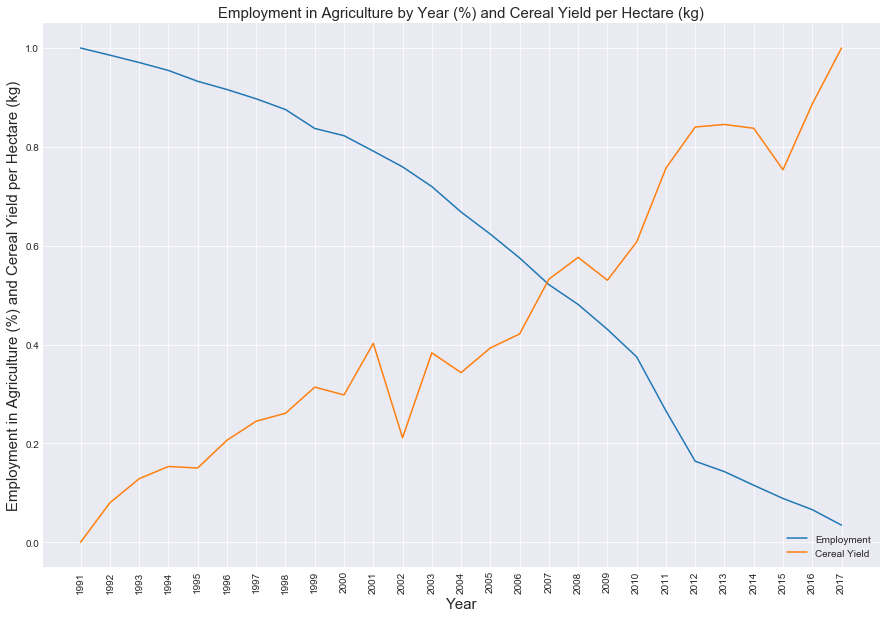

In [45]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,10))
plt.plot(norm_years, em_normalized, label='Employment')
plt.plot(norm_years, yield_normalized, label='Cereal Yield')
plt.title('Employment in Agriculture by Year (%) and Cereal Yield per Hectare (kg)', fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Employment in Agriculture (%) and Cereal Yield per Hectare (kg)', fontsize = 15)
plt.legend()

## Rainfall

In [137]:
rain = pd.read_csv('datafile.csv')
rain = rain.set_index('YEAR')
rain = rain['ANN']
rain.head()

YEAR
1901    1030.8
1902    1038.4
1903    1195.9
1904    1025.1
1905     977.5
Name: ANN, dtype: float64

In [138]:
rainyears = rain.index.tolist()
rainvals = list(rain.values)

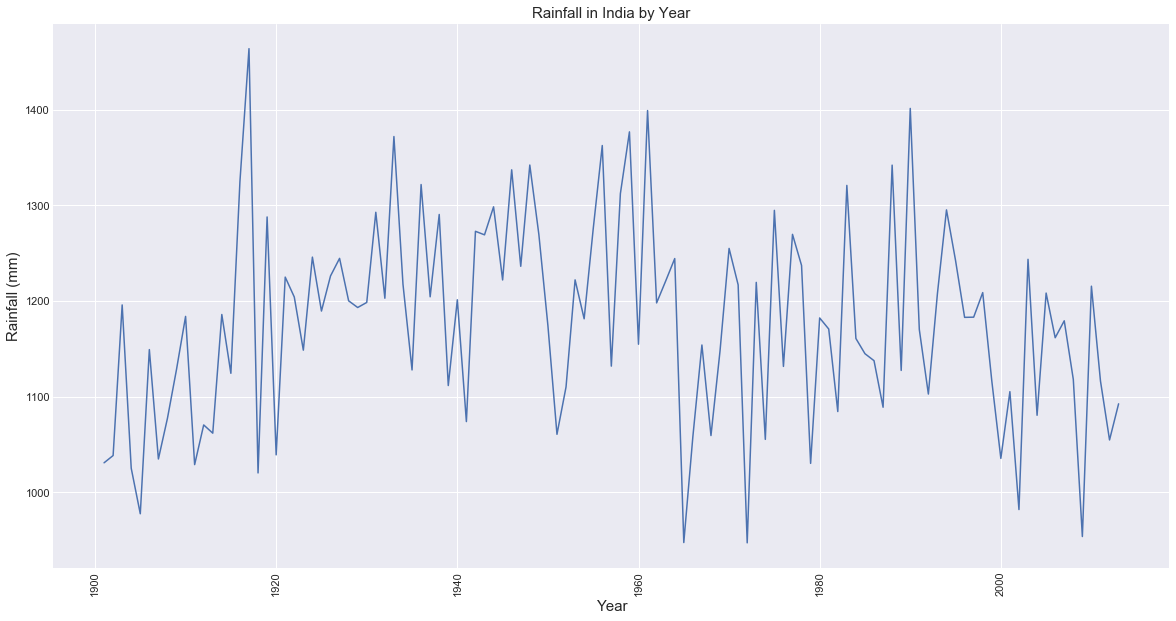

In [212]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20,10))
plt.plot(rainyears, rainvals)
plt.title('Rainfall in India by Year', fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Rainfall (mm)', fontsize = 15)
plt.show()

## Webscrape Wikipedia Data

In [121]:
website_url = requests.get('https://en.wikipedia.org/wiki/Farmers%27_suicides_in_India').text
soup = BeautifulSoup(website_url, 'lxml')
table = soup.find('table', {'class': 'wikitable'})
data = table.findAll('td')

In [122]:
numbers = []
for i in range(len(data) - 3):
    i = i + 3
    if i % 2 == 0:
        pass
    else:
        numbers.append(float(data[i].text))


In [123]:
reasons = []
for i in range(len(data) - 3):
    i = i + 2
    if i % 2 == 0:
        reason = data[i].text
        reasons.append(reason[:len(reason)-1])
    else:
        continue


In [124]:
reason_df = pd.DataFrame(columns=['Reason', 'Percentage'])
reason_df['Reason'] = reasons
reason_df['Percentage'] = numbers
reason_df

Reason  Percentage
0                                   Failure of crops       16.84
1                     Other reasons (e.g. chit fund)       15.04
2                Family problems with spouse, others       13.27
3                                    Chronic illness        9.73
4                              Marriage of daughters        5.31
5                              Political affiliation        4.42
6                                  Property disputes        2.65
7                                        Debt burden        2.65
8                                        Price crash        2.65
9   Borrowing too much (e.g. for house construction)        2.65
10                     Losses in non-farm activities        1.77
11                              Failure of bore well        0.88

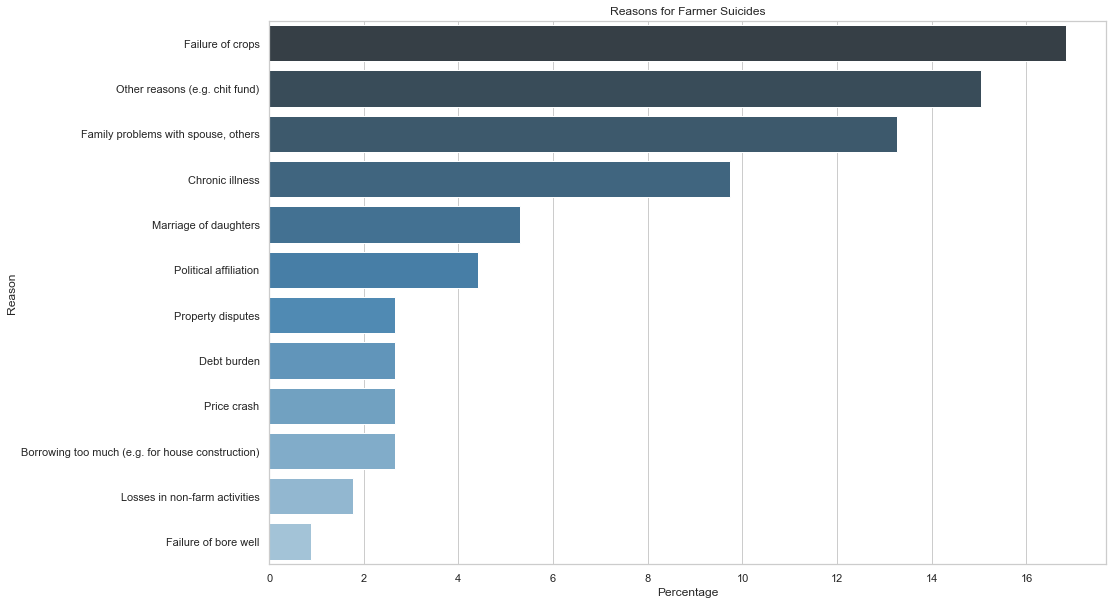

In [135]:
sns.set(style='whitegrid',rc={'figure.figsize':(15,10)})
ax = sns.barplot(x='Percentage', y='Reason', data= reason_df, palette='Blues_d').set_title('Reasons for Farmer Suicides')

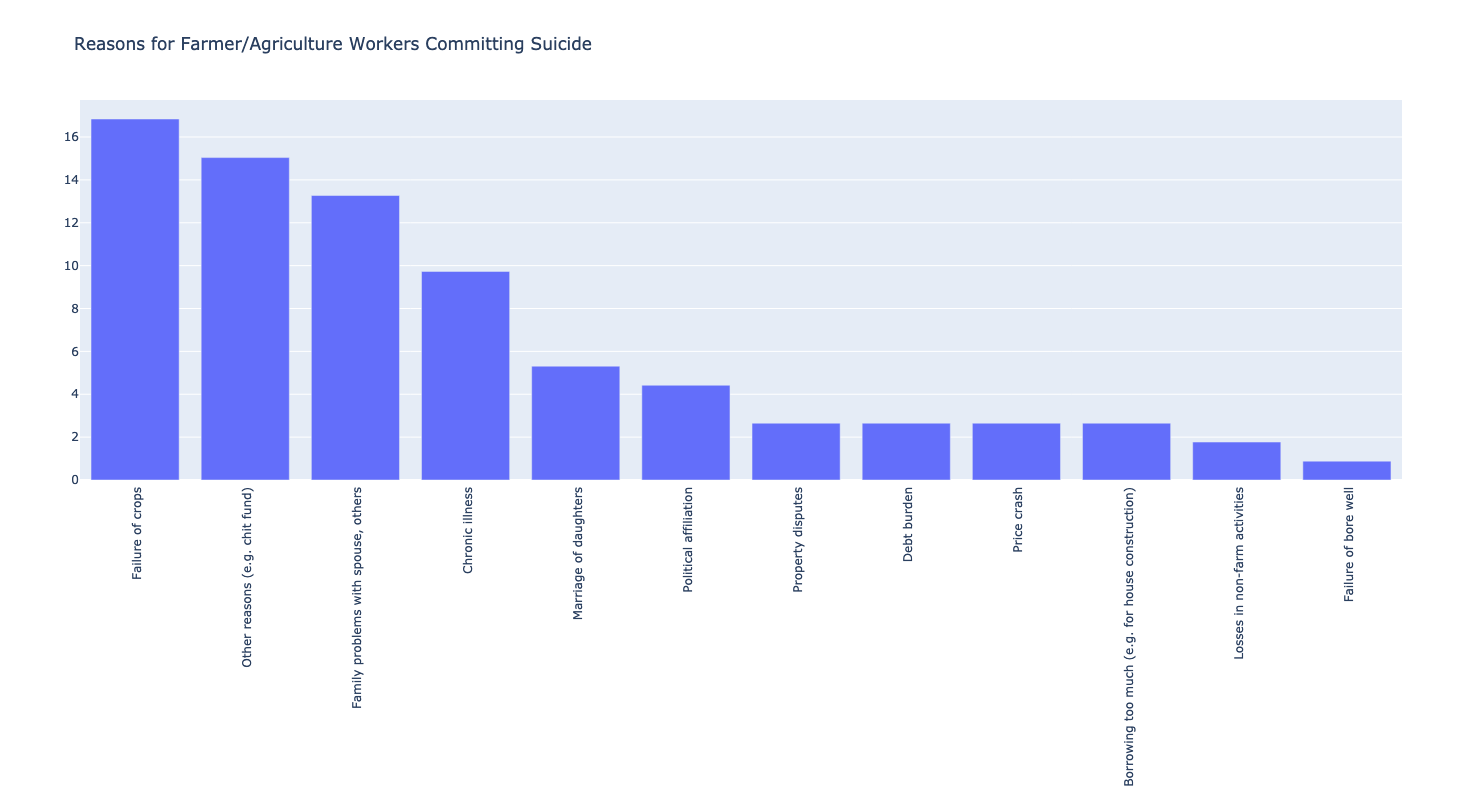

In [127]:
fig = go.Figure(data=[go.Bar(x=reason_df['Reason'], y=reason_df['Percentage'], textposition='auto')])
fig.update_layout(xaxis_tickangle=-90,width = 1000, height = 800, title='Reasons for Farmer/Agriculture Workers Committing Suicide'
                 )
fig.show()

## Correlation between Rainfall and Climate

In [165]:
c_df.head()

YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT  \
0  1901  13.58  14.72  17.91  20.93  23.18  24.05  23.82  23.58  22.09  20.20   
1  1902  13.08  14.20  18.44  21.30  23.63  23.97  23.68  23.34  22.11  19.63   
2  1903  13.20  14.55  17.12  20.67  22.95  23.85  23.53  23.29  22.84  20.12   
3  1904  13.04  14.07  17.70  21.42  23.02  23.64  23.35  23.03  21.65  19.50   
4  1905  12.83  12.74  16.88  19.62  23.32  24.13  23.93  24.31  22.47  21.65   

     NOV    DEC  ANNUAL  JAN-FEB  MAR-MAY  JUN-SEP  OCT-DEC  
0  16.16  13.41   19.51    14.16    20.67    23.38    16.59  
1  16.35  13.53   19.44    13.64    21.12    23.28    16.50  
2  15.84  12.93   19.25    13.87    20.25    23.40    16.29  
3  15.77  14.06   19.22    13.72    20.72    22.96    16.44  
4  16.63  13.59   19.03    12.81    19.97    23.43    16.39

In [167]:
rain.tail()

YEAR
2009     953.7
2010    1215.5
2011    1116.3
2012    1054.7
2013    1092.5
Name: ANN, dtype: float64

In [148]:
years = c_df['YEAR']
rain_vals = list(rain.values)
climate_vals = list(c_df['ANNUAL'])

In [154]:
adj_years = list(years[:len(years)-4])
adj_climate_vals = list(climate_vals[:len(climate_vals)-4])

In [171]:
rain_climate_df = pd.DataFrame()
rain_climate_df['YEAR'] = adj_years
rain_climate_df['AVG CLIMATE'] = adj_climate_vals
rain_climate_df['AVG RAINFALL'] = rain_vals
#rain_climate_df = pd.DataFrame(rain_climate_df.to_records())
rain_climate_df = rain_climate_df.set_index('YEAR')
rain_climate_df.head()

AVG CLIMATE  AVG RAINFALL
YEAR                           
1901        19.51        1030.8
1902        19.44        1038.4
1903        19.25        1195.9
1904        19.22        1025.1
1905        19.03         977.5

In [172]:
rain_climate_df.corr()

AVG CLIMATE  AVG RAINFALL
AVG CLIMATE        1.0000        0.0501
AVG RAINFALL       0.0501        1.0000

## Prophet Modeling

### Employment Predictions

In [182]:
employment_p = employment
employment_p.index = pd.to_datetime(employment_p.index)
employment_p.index.name = 'ds'

In [183]:
employment_p = employment.rename(columns={217868: 'y'})
employment_p = pd.DataFrame(employment_p.to_records())
employment_p.head()

ds          y
0 1991-01-01  63.048000
1 1992-01-01  62.771000
2 1993-01-01  62.486000
3 1994-01-01  62.178001
4 1995-01-01  61.757000

In [185]:
my_model = Prophet(interval_width=0.95)
my_model.fit(employment_p)
future_dates = my_model.make_future_dataframe(periods=10, freq='Y')
forecast = my_model.predict(future_dates)
forecast[['ds','yhat', 'yhat_lower','yhat_upper']].tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 21.
/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



ds       yhat  yhat_lower  yhat_upper
33 2023-12-31  41.725859   37.693612   45.499277
34 2024-12-31  40.463783   35.585161   45.377299
35 2025-12-31  40.112220   34.227958   45.912103
36 2026-12-31  39.839508   33.369906   46.755431
37 2027-12-31  39.655483   32.139526   47.896074

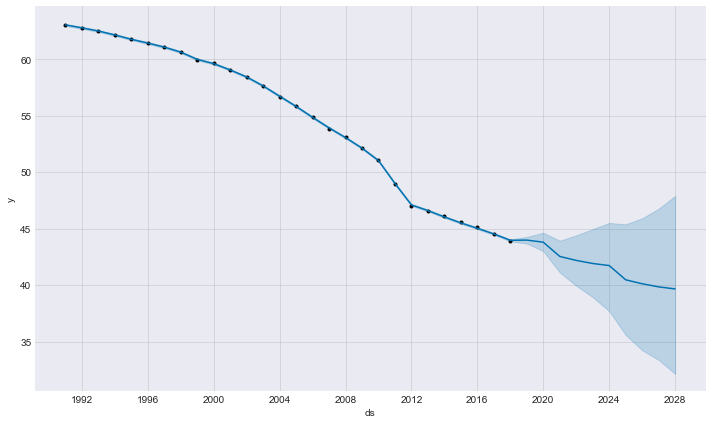

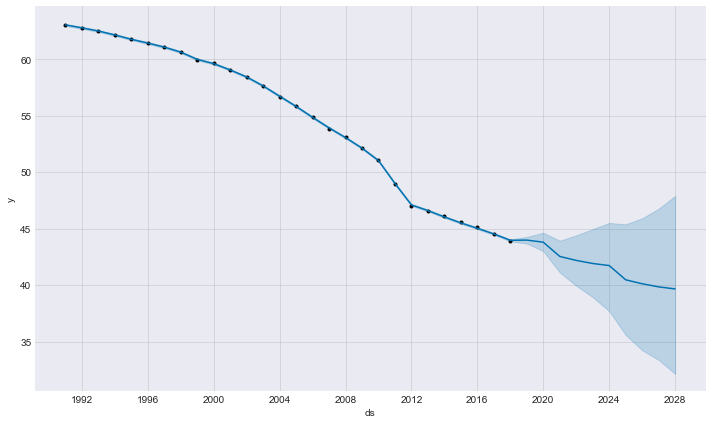

In [186]:
my_model.plot(forecast, uncertainty=True)

### Yield Predictions

In [187]:
yield_df_p = yield_df
yield_df_p.index = pd.to_datetime(yield_df_p.index)
yield_df_p.index.name = 'ds'

In [189]:
yield_df_p = yield_df_p.rename(columns={217619: 'y'})
yield_df_p = pd.DataFrame(yield_df_p.to_records())
yield_df_p.head()

ds      y
0 1961-01-01  947.3
1 1962-01-01  929.7
2 1963-01-01  965.8
3 1964-01-01  993.6
4 1965-01-01  854.4

In [192]:
my_model = Prophet(interval_width=0.95)
my_model.fit(yield_df_p)
future_dates = my_model.make_future_dataframe(periods=10, freq='Y')
forecast = my_model.predict(future_dates)
forecast[['ds','yhat', 'yhat_lower','yhat_upper']].tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds         yhat   yhat_lower   yhat_upper
62 2022-12-31  3595.775246  3451.031088  3754.736632
63 2023-12-31  3782.514706  3634.489898  3932.278505
64 2024-12-31  3487.623674  3330.585271  3650.197633
65 2025-12-31  3617.662401  3460.020812  3758.197126
66 2026-12-31  3776.162599  3623.176038  3929.614364

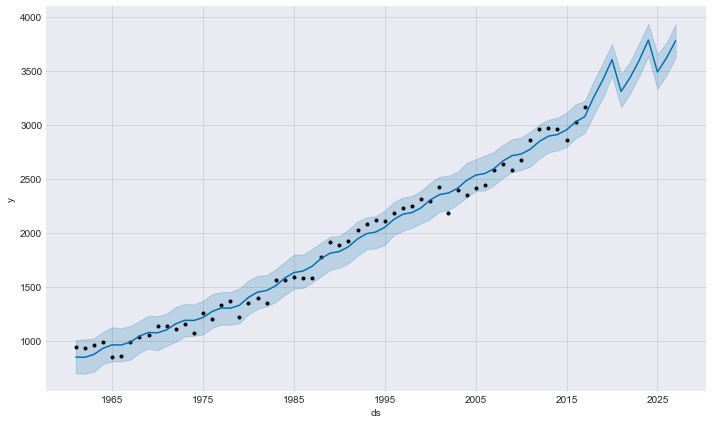

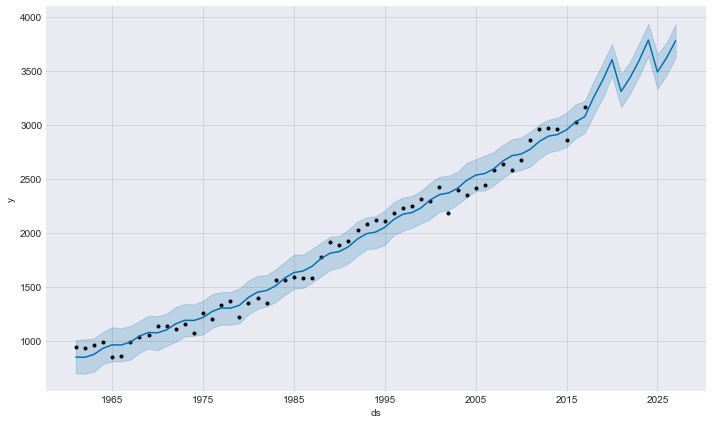

In [193]:
my_model.plot(forecast, uncertainty=True)

## C02 Emissions

In [90]:
e_df = df.loc[df['Indicator Name'] == 'CO2 emissions (metric tons per capita)']
e_df = e_df.drop(['Country Name', 'Country Code', 'Indicator Code', 'Unnamed: 63', 'Indicator Name'], axis = 1)
e_df

1960      1961      1962      1963      1964      1965     1966  \
217671  0.267634  0.283704  0.305851  0.321795  0.308169  0.332527  0.33704   

            1967      1968      1969      1970     1971      1972      1973  \
217671  0.330974  0.352457  0.351187  0.351489  0.36253  0.374899  0.377193   

            1974      1975      1976      1977      1978     1979      1980  \
217671  0.381064  0.404751  0.413697  0.427725  0.424114  0.43469  0.449267   

            1981      1982      1983      1984      1985      1986     1987  \
217671  0.473644  0.477491  0.505277  0.506132  0.543977  0.570556  0.59594   

           1988      1989      1990      1991      1992      1993      1994  \
217671  0.62995  0.676938  0.709001  0.738483  0.768814  0.780347  0.808724   

            1995      1996     1997      1998      1999      2000      2001  \
217671  0.841937  0.898163  0.91686  0.918329  0.959259  0.976602  0.968514   

            2002      2003      2004      2005      2006      2007      2008  \
217671  0.964275  0.989271  1.021863  1.065312  1.118604  1.189652  1.306254   

           2009      2010      2011      2012    2013      2014  2015  2016  \
217671  1.42778  1.393273  1.473081  1.594668  1.5886  1.727671   NaN   NaN   

        2017  2018  
217671   NaN   NaN

In [91]:
e_df = e_df.T
e_df = e_df.dropna()
years = e_df.index.tolist()
values = e_df[217671]

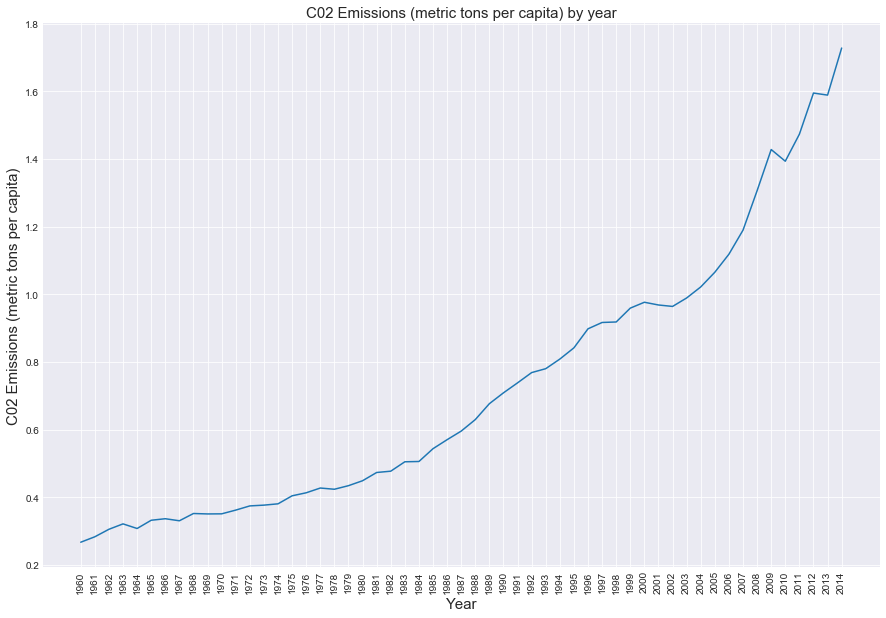

In [77]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,10))
plt.plot(years, values)
plt.title('C02 Emissions (metric tons per capita) by year', fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('C02 Emissions (metric tons per capita)', fontsize = 15)
plt.show()

## C02 Prediction using Prophet Modeling 

In [102]:
p_values = values
p_years = years

In [103]:
e_p_df = pd.DataFrame()
e_p_df['ds'] = p_years
e_p_df = e_p_df.set_index('ds')
e_p_df['y'] = list(p_values)
e_p_df.head()

y
ds            
1960  0.267634
1961  0.283704
1962  0.305851
1963  0.321795
1964  0.308169

In [105]:
e_p_df.index = pd.to_datetime(e_p_df.index, format='%Y')

In [107]:
e_p_df = pd.DataFrame(e_p_df.to_records())

In [203]:
my_model = Prophet(interval_width=0.95)
my_model.fit(e_p_df)
future_dates = my_model.make_future_dataframe(periods=10, freq='Y')


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [204]:
forecast = my_model.predict(future_dates)
#forecast[['ds','yhat', 'yhat_lower','yhat_upper']]
#forecast = forecast.rename(columns={'ds':'Year','yhat': 'C02 Emission'})

In [205]:
forecast.tail()

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
60 2019-12-31  2.062534    2.039432    2.174661     2.026231     2.096635   
61 2020-12-31  2.120581    2.003014    2.147213     2.074751     2.163214   
62 2021-12-31  2.178470    2.082847    2.237180     2.122055     2.231392   
63 2022-12-31  2.236358    2.156565    2.325613     2.170233     2.300995   
64 2023-12-31  2.294247    2.239335    2.433843     2.217167     2.371454   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \
60        0.040690              0.040690              0.040690  0.040690   
61       -0.040811             -0.040811             -0.040811 -0.040811   
62       -0.020318             -0.020318             -0.020318 -0.020318   
63        0.006865              0.006865              0.006865  0.006865   
64        0.040690              0.040690              0.040690  0.040690   

    yearly_lower  yearly_upper  multiplicative_terms  \
60      0.040690      0.040690                   0.0   
61     -0.040811     -0.040811                   0.0   
62     -0.020318     -0.020318                   0.0   
63      0.006865      0.006865                   0.0   
64      0.040690      0.040690                   0.0   

    multiplicative_terms_lower  multiplicative_terms_upper      yhat  
60                         0.0                         0.0  2.103224  
61                         0.0                         0.0  2.079770  
62                         0.0                         0.0  2.158152  
63                         0.0                         0.0  2.243223  
64                         0.0                         0.0  2.334937

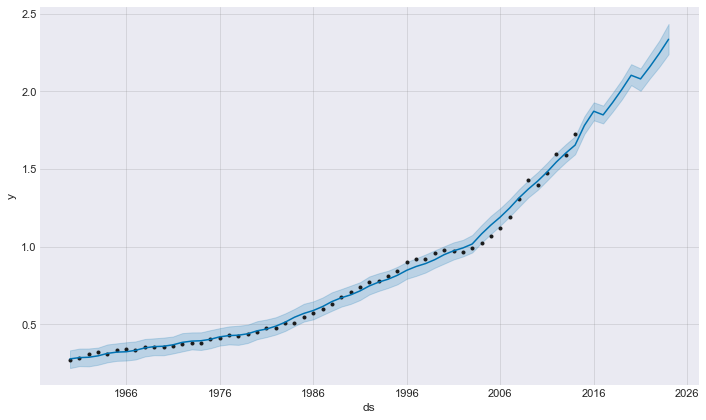

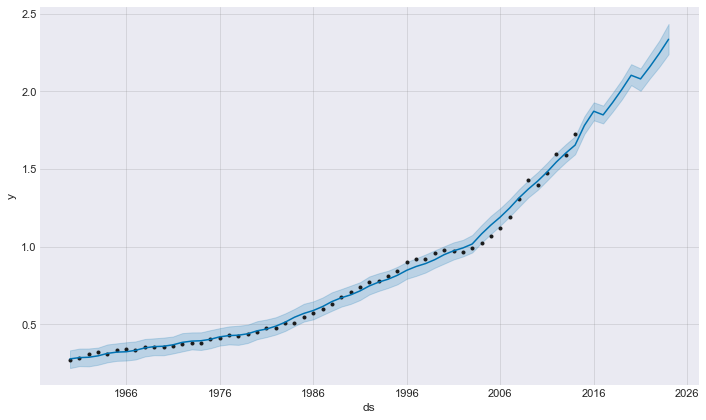

In [206]:
my_model.plot(forecast,uncertainty=True)

## Correlation between C02 Emissions and Climate Change

In [158]:
ce_years = list(c_df['YEAR'])
ce_years = ce_years[59:len(ce_years)-3]

In [159]:
c_values = list(c_df['ANNUAL'])
c_values = c_values[59:len(c_values)-3]

In [160]:
e_values = list(e_df[217671])

In [161]:
ce_df = pd.DataFrame()
ce_df['YEAR'] = ce_years
ce_df['AVG C02 Emissions'] = e_values
ce_df['AVG Climate'] = c_values
ce_df = ce_df.set_index('YEAR')

In [162]:
ce_df.corr()

AVG C02 Emissions  AVG Climate
AVG C02 Emissions           1.000000     0.697478
AVG Climate                 0.697478     1.000000

## Suicide

In [3]:
s_df = pd.read_csv('Suicides_in_India.csv')
s_df.head()

State  Year Type_code                                 Type  Gender  \
0  A & N ISLANDS  2001    Causes                               Cancer    Male   
1  A & N ISLANDS  2001    Causes                              Divorce    Male   
2  A & N ISLANDS  2001    Causes                        Dowry Dispute  Female   
3  A & N ISLANDS  2001    Causes  Ideological Causes/Hero Worshipping  Female   
4  A & N ISLANDS  2001    Causes                   Illness (Aids/STD)  Female   

  Age_group  Total  
0     15-29      0  
1       60+      0  
2       60+      0  
3       60+      0  
4      0-14      0

In [29]:
totals = []
for i in range(12):
    temp_df = s_df.loc[s_df['Year'] == 2001 + i]
    total = temp_df['Total'].sum()
    totals.append(total)

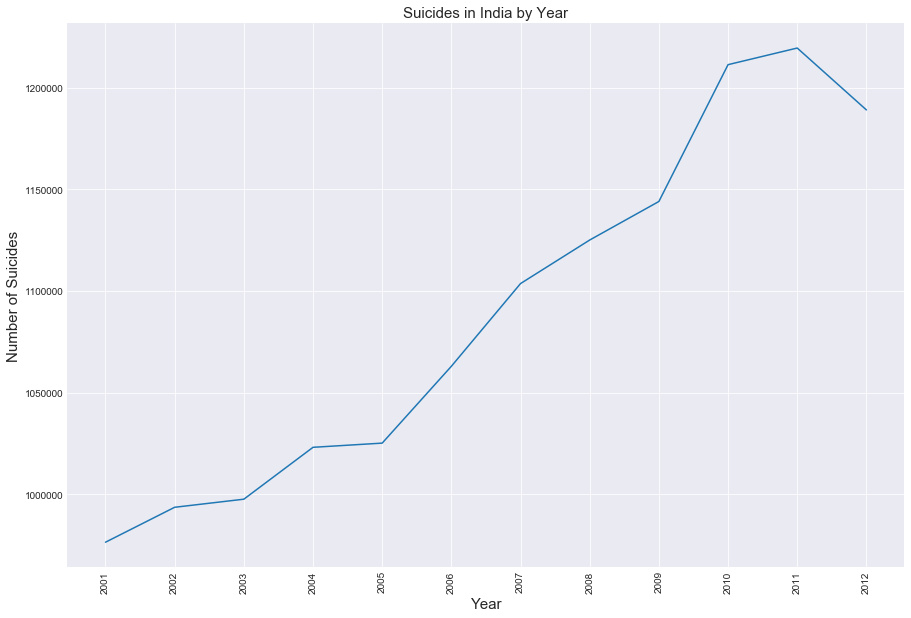

In [45]:
years = [2001, 2002, 2003, 2004, 2005, 2006 , 2007, 2008, 2009, 2010, 2011, 2012]
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,10))
plt.plot(years, totals)
plt.title('Suicides in India by Year', fontsize = 15)
plt.xticks(years,rotation = 'vertical')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Number of Suicides', fontsize = 15)
plt.show()

In [31]:
f_df = s_df.loc[s_df['Type'] == 'Farming/Agriculture Activity']
f_df.head()

State  Year             Type_code                          Type  \
36  A & N ISLANDS  2002  Professional_Profile  Farming/Agriculture Activity   
37  A & N ISLANDS  2002  Professional_Profile  Farming/Agriculture Activity   
59  A & N ISLANDS  2003  Professional_Profile  Farming/Agriculture Activity   
79  A & N ISLANDS  2004  Professional_Profile  Farming/Agriculture Activity   
95  A & N ISLANDS  2001  Professional_Profile  Farming/Agriculture Activity   

    Gender Age_group  Total  
36  Female     45-59      0  
37    Male     30-44      3  
59  Female      0-14      0  
79  Female     30-44      0  
95    Male     15-29      0

In [32]:
#https://timesofindia.indiatimes.com/india/NDA-UPA-failed-to-curb-farmer-suicides/articleshow/39501676.cms

In [33]:
ftotals = [10720,13729,13622,16015,16082,16603]
for i in range(12):
    temp_df = f_df.loc[s_df['Year'] == 2001 + i]
    total = temp_df['Total'].sum()
    ftotals.append(total)

In [41]:
for i in range(len(years)):
    years[i] = int(years[i])

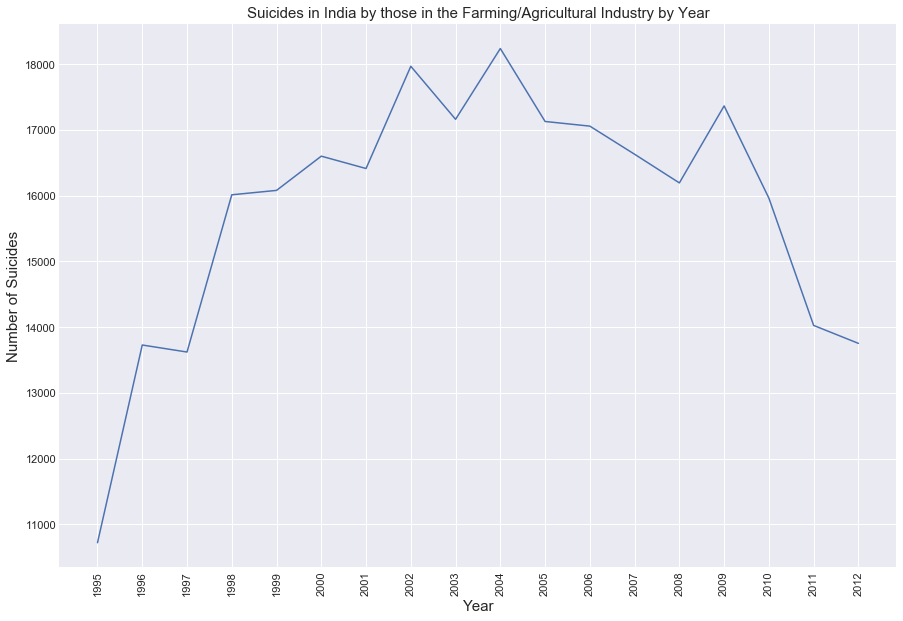

In [136]:
years = [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006 , 2007, 2008, 2009, 2010, 2011, 2012]
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,10))
plt.plot(years, ftotals)
plt.title('Suicides in India by those in the Farming/Agricultural Industry by Year', fontsize = 15)
plt.xticks(years, rotation = 'vertical')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Number of Suicides', fontsize = 15)
plt.show()

In [56]:
new_valuesf = []
for i in range(len(ftotals1)):
    max1 = max(ftotals1)
    min1 = min(ftotals1)
    new_valuesf.append((ftotals1[i] - min1) / (max1 - min1))

In [47]:
new_valuesS = []
for i in range(len(totals)):
    max1 = max(totals)
    min1 = min(totals)
    new_valuesS.append((totals[i] - min1) / (max1 - min1))

In [54]:
ftotals1 = []
for i in range(12):
    temp_df = f_df.loc[s_df['Year'] == 2001 + i]
    total = temp_df['Total'].sum()
    ftotals1.append(total)

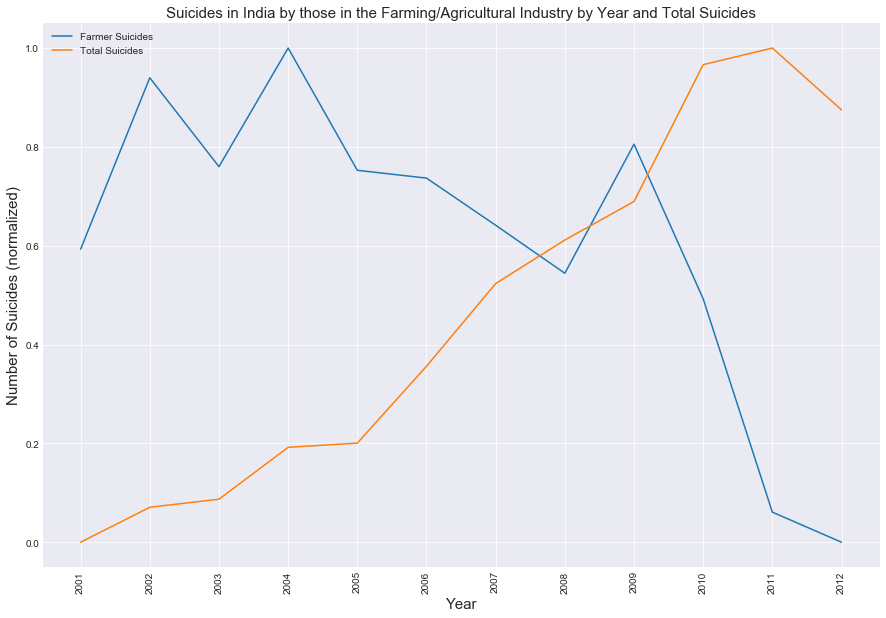

In [57]:
years = [2001, 2002, 2003, 2004, 2005, 2006 , 2007, 2008, 2009, 2010, 2011, 2012]
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,10))
plt.plot(years, new_valuesf, label='Farmer Suicides')
plt.plot(years, new_valuesS, label='Total Suicides')
plt.title('Suicides in India by those in the Farming/Agricultural Industry by Year and Total Suicides', fontsize = 15)
plt.xticks(years, rotation = 'vertical')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Number of Suicides (normalized)', fontsize = 15)
plt.legend()

## Correlation Visualization

In [ ]:
# 1995 to 2012

In [243]:
c_df.head()

YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT  \
0  1901  13.58  14.72  17.91  20.93  23.18  24.05  23.82  23.58  22.09  20.20   
1  1902  13.08  14.20  18.44  21.30  23.63  23.97  23.68  23.34  22.11  19.63   
2  1903  13.20  14.55  17.12  20.67  22.95  23.85  23.53  23.29  22.84  20.12   
3  1904  13.04  14.07  17.70  21.42  23.02  23.64  23.35  23.03  21.65  19.50   
4  1905  12.83  12.74  16.88  19.62  23.32  24.13  23.93  24.31  22.47  21.65   

     NOV    DEC  ANNUAL  JAN-FEB  MAR-MAY  JUN-SEP  OCT-DEC  
0  16.16  13.41   19.51    14.16    20.67    23.38    16.59  
1  16.35  13.53   19.44    13.64    21.12    23.28    16.50  
2  15.84  12.93   19.25    13.87    20.25    23.40    16.29  
3  15.77  14.06   19.22    13.72    20.72    22.96    16.44  
4  16.63  13.59   19.03    12.81    19.97    23.43    16.39

In [242]:
e_df.head()

217671
1960  0.267634
1961  0.283704
1962  0.305851
1963  0.321795
1964  0.308169

In [244]:
rain.head()

YEAR
1901    1030.8
1902    1038.4
1903    1195.9
1904    1025.1
1905     977.5
Name: ANN, dtype: float64

In [153]:
rainyears_c = rainyears[94:len(rainyears)-1]
rainvals_c = rainvals[94:len(rainvals)-1]

In [224]:
climyears = list(c_df['YEAR'])
climyears = climyears[94:len(climyears)-5]
climvals = list(c_df['ANNUAL'])
climvals = climvals[94:len(climvals)-5]

In [234]:
climyears1 = list(c_df['YEAR'])
climyears1 = climyears1[59:]
climvals1 = list(c_df['ANNUAL'])
climvals1 = climvals1[59:]
rainvals_c1 = rainvals[59:]

In [189]:
values
co2 = list(values)
co2 = co2[35:len(co2)-2]

In [227]:
rs_corr = pd.DataFrame()
rs_corr['Year'] = rainyears_c
rs_corr['Farmer Suicides'] = ftotals
rs_corr['Annual Rainfall'] = rainvals_c
rs_corr['Average Climate'] = climvals
rs_corr['C02 Emission'] = co2
rs_corr = rs_corr.set_index('Year')
rs_corr.head()

Farmer Suicides  Annual Rainfall  Average Climate  C02 Emission
Year                                                                 
1995            10720           1242.4            20.39      0.841937
1996            13729           1182.9            19.55      0.898163
1997            13622           1183.1            19.21      0.916860
1998            16015           1208.8            19.84      0.918329
1999            16082           1116.6            19.53      0.959259

In [228]:
corr = rs_corr.corr()
corr

Farmer Suicides  Annual Rainfall  Average Climate  \
Farmer Suicides         1.000000        -0.380850        -0.115167   
Annual Rainfall        -0.380850         1.000000         0.204288   
Average Climate        -0.115167         0.204288         1.000000   
C02 Emission            0.033663        -0.333517         0.053715   

                 C02 Emission  
Farmer Suicides      0.033663  
Annual Rainfall     -0.333517  
Average Climate      0.053715  
C02 Emission         1.000000

Text(0.5, 1.0, 'Correlation Heatmap')

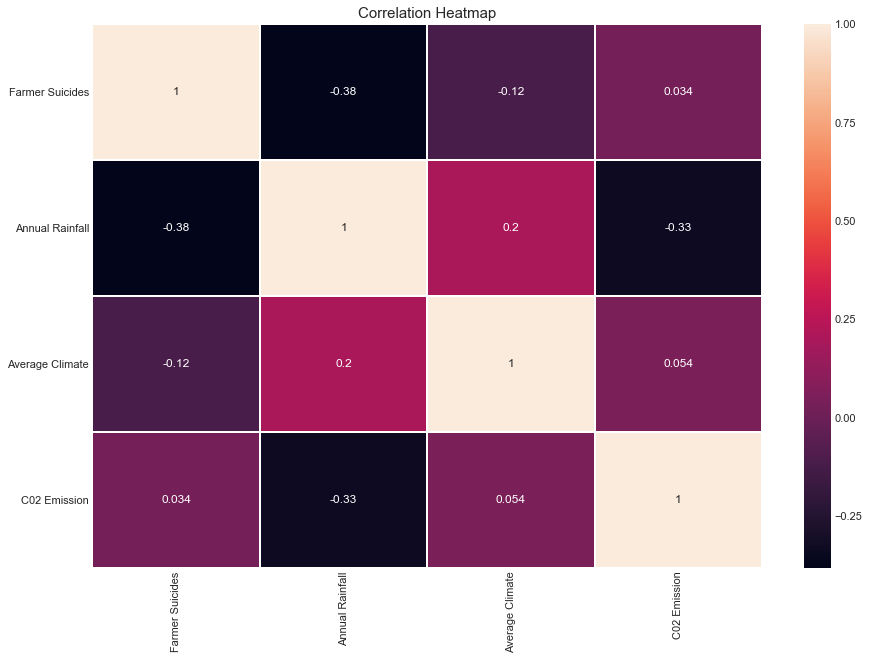

In [230]:
sns.heatmap(corr,  annot=True, linewidths=1)
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.title('Correlation Heatmap', fontsize = 15)


In [ ]:
cmap="YlGnBu",